<a href="https://colab.research.google.com/github/Janainareisnascimento/Adsensefinal/blob/main/2022_Adsense_modelagem_team_mounted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Habilitando o acesso ao Google Drive no Colab**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive


# **2) Bibliotecas fundamentais**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


import matplotlib
import matplotlib.pyplot as plt
# Change 'default' to the style that you want to try out
matplotlib.style.use('seaborn')


#Configurar o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Módulos de DataPrep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Modelos de regressão que serão testados
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Configurar o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# **3) Perguntas a serem respondidas**


1.   Qual o valor de monetização/mês realizado por canal na modalidade Reserva?
2.   Qual o valor de monetização/mês realizado por canal na modalidade Leilão?
3. O valor de monetização/mês na modalidade reserva é compativel com nosso baseline?
4.  O valor de monetização/mês na modalidade Leilão é compativel com nosso baseline?
3. Qual foi o valor total monetizado na modalidade reserva no período?
4. Qual foi o valor total monetizado na modalidade Leilão no período?
5. Qual a relação entre valor monetizado e engajamento do canal/vídeos?







# **4) Hipóteses a serem testadas**



1.  O intervalo entre os relatórios financeiros correspondem ao intervalo a ser considerado na extração mensal de receitas dos canais;
2. A soma de todas as features de receita correspondem ao valor monetizado por canal; 
3. A normalização do valor total de receitas declaradas no relatorio financeiro, juntamente com a porcentagem do valor por canal, nos levam ao valor total monetizado no canal/mês;





# **5) Importando a base de dados**

In [23]:
# base_afiliados = pd.read_csv("/content/2022_affiliate - Csv_afiliados.csv", decimal=",")
base_afiliados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adsense/2022_affiliate - Csv_afiliados.csv", decimal=",")


In [8]:
base_afiliados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Canal                                         497 non-null    object 
 1   Título do canal                               496 non-null    object 
 2   RPM (USD)                                     497 non-null    float64
 3   Estimativa de reproduções monetizadas         497 non-null    int64  
 4   CPM baseado em exibição (USD)                 496 non-null    float64
 5   CPM (USD)                                     497 non-null    float64
 6   Impressões de anúncios                        497 non-null    int64  
 7   Sua receita estimada do DoubleClick (USD)     497 non-null    float64
 8   Receita de anúncios no YouTube (USD)          497 non-null    float64
 9   Transações                                    497 non-null    int

# **6) Análise exploratória dos dados**

In [9]:
base_afiliados.head()

,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,0.96,602699011,1.68,1.31,774071241,31255.43,1014819.19,34701,52094.30,526564.76,557820.19,1.06,36941.94,1026222679,87264022.19,0:05:06,686424.79
1,UCcXV2JeP2g9kmXP9-F1xjrg,Futirinhas,1.32,44268995,2.28,1.71,59147595,3831.95,101064.69,610,3320.49,51747.04,55578.99,0.36,220.92,44929573,4670970.24,0:06:14,59120.40
2,UCxcDCeShqZWIUQuEo2iJSVA,Mauricio Meirelles,2.49,19807428,4.22,2.92,28583793,17580.05,83527.42,16,10796.79,28366.26,45946.31,1.15,18.46,27671811,7446994.06,0:16:08,56761.57
3,UCriRvZSnEFPSMqSya2s2U6g,Banheiristas,0.60,46212494,1.55,1.15,62574290,3858.36,71733.12,0,1029.71,35584.20,39442.56,NaN,0.00,69950500,8379176.08,0:07:11,40472.27
4,UCf0bs928KW_GIN6q0XeiJ2Q,RaFla Mello,1.18,39777901,1.64,1.28,50792558,42.10,65088.29,563,736.15,35762.33,35804.43,0.98,549.39,32147861,2523845.66,0:04:42,37089.97


In [10]:
base_afiliados.head(15)

,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,0.96,602699011,1.68,1.31,774071241,31255.43,1014819.19,34701,52094.30,526564.76,557820.19,1.06,36941.94,1026222679,87264022.19,0:05:06,686424.79
1,UCcXV2JeP2g9kmXP9-F1xjrg,Futirinhas,1.32,44268995,2.28,1.71,59147595,3831.95,101064.69,610,3320.49,51747.04,55578.99,0.36,220.92,44929573,4670970.24,0:06:14,59120.40
2,UCxcDCeShqZWIUQuEo2iJSVA,Mauricio Meirelles,2.49,19807428,4.22,2.92,28583793,17580.05,83527.42,16,10796.79,28366.26,45946.31,1.15,18.46,27671811,7446994.06,0:16:08,56761.57
3,UCriRvZSnEFPSMqSya2s2U6g,Banheiristas,0.60,46212494,1.55,1.15,62574290,3858.36,71733.12,0,1029.71,35584.20,39442.56,NaN,0.00,69950500,8379176.08,0:07:11,40472.27
4,UCf0bs928KW_GIN6q0XeiJ2Q,RaFla Mello,1.18,39777901,1.64,1.28,50792558,42.10,65088.29,563,736.15,35762.33,35804.43,0.98,549.39,32147861,2523845.66,0:04:42,37089.97
5,UCIkAO7iHS6R9AtcABE9MdRQ,Energia 97 FM,0.96,46703480,1.30,1.08,55911814,463.31,60606.64,1493,10423.39,32661.88,33125.19,1.15,1711.80,47297132,10136408.72,0:12:51,45260.38
6,UCV91rzdOwAThxQS79JcYsXQ,Gustavo Henrique Dando Choque,1.19,27867392,1.79,1.39,35946540,16.79,49990.55,544,576.25,27480.11,27496.90,1.15,627.93,24209019,1761287.24,0:04:21,28701.08
7,UCU7uY3wCPh9j39KXzOpqNaw,Julio Cocielo,0.60,24458667,1.48,1.11,32526912,0.29,36120.81,6,817.46,19862.67,19862.96,0.58,3.47,34336638,3387284.94,0:05:55,20683.90
8,UCPrYKS7TByOIwWvAt3tsV-A,Arnaldo e Tironi,2.65,12718488,2.62,1.94,17237685,0.21,33373.09,7589,5655.56,18361.70,18361.92,1.20,9134.37,12582485,4187021.86,0:19:57,33151.85
9,UCMPPsRQg12IYk2V7vOfx-9A,Vosso Canal,0.55,19064545,1.39,1.08,24617266,1047.31,26536.52,12,256.26,13501.61,14548.92,1.06,12.76,40356691,2794146.19,0:04:09,14817.93


In [11]:
base_afiliados.tail(15)


,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
482,UCs-6sCz2LJm1PrWQN4ErsPw,TNT Sports Brasil,0.03,26,1.23,1.07,30,0.00,0.03,0,0.00,0.00,0.01,NaN,0.00,37,1.69,0:02:44,0.01
483,UCyGQnOAy1utvzSPXwMjYp2w,Programa Reclame,0.32,16,2.00,1.88,17,0.00,0.03,0,0.01,0.01,0.01,NaN,0.00,56,3.35,0:03:35,0.02
484,UCTiIVm9iGyoo9OKAD5r1jcg,Futebol Arte,0.06,1,30.00,30.00,1,0.00,0.03,0,0.00,0.01,0.01,NaN,0.00,134,2.62,0:01:10,0.01
485,UCA-PFvxMrBBYMtBxVdzUxoA,Liga Paulista Futsal,0.89,2,14.50,14.50,2,0.00,0.03,0,0.00,0.01,0.01,NaN,0.00,9,0.26,0:01:43,0.01
486,UCQE-cQWSpAqPr_429lWm8IQ,Multiverse Moo,2.44,1,29.00,29.00,1,0.00,0.03,0,0.00,0.02,0.02,NaN,0.00,9,0.34,0:02:17,0.02
487,UCgTDLrMHWjRJFu1X7ACx3cw,No Guts No Glory,1.00,4,7.25,7.25,4,0.00,0.03,0,0.00,0.01,0.01,NaN,0.00,8,0.06,0:00:28,0.01
488,UCoiOOEQi6yPwJyGjACh_NCA,De Olho No Futebol,0.01,2,14.50,14.50,2,0.00,0.03,0,0.02,0.02,0.02,NaN,0.00,2454,103.17,0:02:31,0.04
489,UCCfx5tbsk4Lx2sGcnTZCjWw,Dreadly Monk,0.44,11,2.46,1.50,18,0.00,0.03,0,0.00,0.01,0.01,NaN,0.00,34,1.62,0:02:51,0.01
490,UC16c6rHsBCmHd-7ufc1ZZbA,CANAL TIRO DE META,0.26,19,1.37,1.08,24,0.00,0.03,0,0.00,0.01,0.01,NaN,0.00,55,1.78,0:01:56,0.01
491,UCAi_MmZdY2LlteyQtnSrpaw,Motorsport Live Magyarország,0.69,18,1.39,1.09,23,0.00,0.03,0,0.02,0.01,0.01,NaN,0.00,45,1.87,0:02:29,0.03



# Tratamento dos dados

In [12]:
from datetime import timedelta

#Tratando a variavel duração média da visualização 
base_afiliados['Duração média da visualização'] = pd.to_datetime(base_afiliados['Duração média da visualização'], format='%H:%M:%S').dt.time
base_afiliados['Duração média da visualização'] = pd.to_timedelta(base_afiliados['Duração média da visualização'].astype(str)).dt.total_seconds()/60
base_afiliados.head()

,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,0.96,602699011,1.68,1.31,774071241,31255.43,1014819.19,34701,52094.30,526564.76,557820.19,1.06,36941.94,1026222679,87264022.19,5.10,686424.79
1,UCcXV2JeP2g9kmXP9-F1xjrg,Futirinhas,1.32,44268995,2.28,1.71,59147595,3831.95,101064.69,610,3320.49,51747.04,55578.99,0.36,220.92,44929573,4670970.24,6.23,59120.40
2,UCxcDCeShqZWIUQuEo2iJSVA,Mauricio Meirelles,2.49,19807428,4.22,2.92,28583793,17580.05,83527.42,16,10796.79,28366.26,45946.31,1.15,18.46,27671811,7446994.06,16.13,56761.57
3,UCriRvZSnEFPSMqSya2s2U6g,Banheiristas,0.60,46212494,1.55,1.15,62574290,3858.36,71733.12,0,1029.71,35584.20,39442.56,NaN,0.00,69950500,8379176.08,7.18,40472.27
4,UCf0bs928KW_GIN6q0XeiJ2Q,RaFla Mello,1.18,39777901,1.64,1.28,50792558,42.10,65088.29,563,736.15,35762.33,35804.43,0.98,549.39,32147861,2523845.66,4.70,37089.97


In [13]:
# Removendo a linha total 

base_afiliados = base_afiliados.query('Canal != "Total"')
base_afiliados.head()

,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
1,UCcXV2JeP2g9kmXP9-F1xjrg,Futirinhas,1.32,44268995,2.28,1.71,59147595,3831.95,101064.69,610,3320.49,51747.04,55578.99,0.36,220.92,44929573,4670970.24,6.23,59120.40
2,UCxcDCeShqZWIUQuEo2iJSVA,Mauricio Meirelles,2.49,19807428,4.22,2.92,28583793,17580.05,83527.42,16,10796.79,28366.26,45946.31,1.15,18.46,27671811,7446994.06,16.13,56761.57
3,UCriRvZSnEFPSMqSya2s2U6g,Banheiristas,0.60,46212494,1.55,1.15,62574290,3858.36,71733.12,0,1029.71,35584.20,39442.56,NaN,0.00,69950500,8379176.08,7.18,40472.27
4,UCf0bs928KW_GIN6q0XeiJ2Q,RaFla Mello,1.18,39777901,1.64,1.28,50792558,42.10,65088.29,563,736.15,35762.33,35804.43,0.98,549.39,32147861,2523845.66,4.70,37089.97
5,UCIkAO7iHS6R9AtcABE9MdRQ,Energia 97 FM,0.96,46703480,1.30,1.08,55911814,463.31,60606.64,1493,10423.39,32661.88,33125.19,1.15,1711.80,47297132,10136408.72,12.85,45260.38


# **Analise Exploratória**

In [14]:
base_afiliados.describe()

,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
count,496.00,496.00,495.00,496.00,496.00,496.00,496.00,496.00,496.00,496.00,496.00,73.00,496.00,496.00,496.00,496.00,496.00
mean,1.20,1214881.89,3.78,3.11,1560328.07,63.01,2045.71,69.96,104.97,1061.44,1124.46,0.97,74.48,2066867.09,175839.21,4.86,1383.68
std,5.80,4987695.53,10.65,8.76,6447276.84,829.68,9020.29,508.28,768.41,4518.47,4959.17,0.69,581.15,8727513.33,825543.28,5.73,5797.79
min,0.00,0.00,0.08,0.20,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.14,0.00,1.00,0.00,0.13,0.00
25%,0.33,77.00,1.10,0.94,88.00,0.00,0.18,0.00,0.00,0.08,0.08,0.63,0.00,277.75,10.26,1.62,0.10
50%,0.60,1615.00,1.51,1.23,1740.00,0.00,2.31,0.00,0.07,0.89,0.95,0.92,0.00,2895.00,193.55,3.30,1.17
75%,1.08,116554.00,2.44,2.00,138681.75,0.00,164.48,0.00,2.69,83.30,83.30,1.15,0.00,163809.00,9535.99,5.70,102.11
max,124.76,46703480.00,152.00,152.00,62574290.00,17580.05,101064.69,7589.00,10796.79,51747.04,55578.99,5.64,9134.37,120517542.00,10136408.72,51.40,59120.40


In [15]:
base_afiliados.shape

(496, 19)

# **7) Análise gráfica**

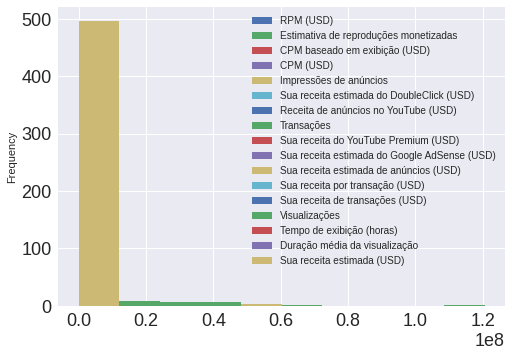

In [16]:
base_afiliados.plot.hist("Sua receita estimada (USD)");

In [17]:
#sns.histplot(data=base_afiliados, x="Sua receita estimada (USD)")

# **9) Regressão linear múltipla**

In [18]:
corr = base_afiliados.select_dtypes(include=['int64', 'float64']).corr() 
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
RPM (USD),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Estimativa de reproduções monetizadas,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CPM baseado em exibição (USD),0.01,-0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CPM (USD),0.01,-0.05,0.84,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Impressões de anúncios,-0.01,1.00,-0.05,-0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Sua receita estimada do DoubleClick (USD),0.01,0.36,-0.00,-0.01,0.39,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Receita de anúncios no YouTube (USD),-0.00,0.95,-0.04,-0.04,0.96,0.59,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Transações,0.01,0.26,-0.02,-0.03,0.26,0.01,0.29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Sua receita do YouTube Premium (USD),0.01,0.59,-0.02,-0.02,0.59,0.66,0.70,0.49,nan,nan,nan,nan,nan,nan,nan,nan,nan
Sua receita estimada do Google AdSense (USD),-0.00,0.97,-0.04,-0.05,0.98,0.47,0.99,0.32,0.64,nan,nan,nan,nan,nan,nan,nan,nan


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
base_afiliados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 1 to 496
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Canal                                         496 non-null    object 
 1   Título do canal                               496 non-null    object 
 2   RPM (USD)                                     496 non-null    float64
 3   Estimativa de reproduções monetizadas         496 non-null    int64  
 4   CPM baseado em exibição (USD)                 495 non-null    float64
 5   CPM (USD)                                     496 non-null    float64
 6   Impressões de anúncios                        496 non-null    int64  
 7   Sua receita estimada do DoubleClick (USD)     496 non-null    float64
 8   Receita de anúncios no YouTube (USD)          496 non-null    float64
 9   Transações                                    496 non-null    int

In [24]:
X = base_afiliados[['RPM (USD)', 'Estimativa de reproduções monetizadas', 'CPM baseado em exibição (USD)', 'CPM (USD)', 'Impressões de anúncios', 'Sua receita estimada do Google AdSense (USD)', 'Sua receita estimada do DoubleClick (USD)', 'Receita de anúncios no YouTube (USD)', 'Sua receita estimada de anúncios (USD)', 'Sua receita do YouTube Premium (USD)', 'Transações', 'Visualizações', 'Tempo de exibição (horas)']]
X = sm.add_constant(X)
Y = base_afiliados["Sua receita estimada (USD)"]

model = sm.OLS(Y,X) 
modelo_fit = model.fit()
print(modelo_fit.summary())

# Variaveis nao significativas Estimativa de reproduções monetizadas, CPM baseado em exibição (USD), 

                                OLS Regression Results                                
Dep. Variable:     Sua receita estimada (USD)   R-squared:                       0.999
Model:                                    OLS   Adj. R-squared:                  0.999
Method:                         Least Squares   F-statistic:                 7.256e+04
Date:                        Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                                22:05:02   Log-Likelihood:                -3967.5
No. Observations:                         497   AIC:                             7963.
Df Residuals:                             483   BIC:                             8022.
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(modelo_fit.model.exog, i) for i in range(1, modelo_fit.model.exog.shape[1])]
vif["Variable"]   = modelo_fit.model.exog_names[1:]
print(vif)



            VIF Factor                                      Variable
0                 1.00                                     RPM (USD)
1             75876.97         Estimativa de reproduções monetizadas
2                 2.97                 CPM baseado em exibição (USD)
3                 2.97                                     CPM (USD)
4            124554.60                        Impressões de anúncios
5  9007199254740992.00  Sua receita estimada do Google AdSense (USD)
6    36764078590779.56     Sua receita estimada do DoubleClick (USD)
7           2101075.31          Receita de anúncios no YouTube (USD)
8  9007199254740992.00        Sua receita estimada de anúncios (USD)
9               410.56          Sua receita do YouTube Premium (USD)
10               19.11                                    Transações
11               61.42                                 Visualizações
12             1781.53                     Tempo de exibição (horas)


In [26]:
X = base_afiliados[['RPM (USD)', 'Estimativa de reproduções monetizadas', 'Impressões de anúncios', 'Sua receita do YouTube Premium (USD)', 'Transações', 'Visualizações', 'Tempo de exibição (horas)']]
X = sm.add_constant(X)
Y = base_afiliados["Sua receita estimada (USD)"]

model = sm.OLS(Y,X) 
modelo_fit = model.fit()
print(modelo_fit.summary())

# Variaveis nao significativas Estimativa de reproduções monetizadas, CPM baseado em exibição (USD), 

                                OLS Regression Results                                
Dep. Variable:     Sua receita estimada (USD)   R-squared:                       0.999
Model:                                    OLS   Adj. R-squared:                  0.999
Method:                         Least Squares   F-statistic:                 9.131e+04
Date:                        Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                                22:05:16   Log-Likelihood:                -4067.2
No. Observations:                         497   AIC:                             8150.
Df Residuals:                             489   BIC:                             8184.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------


# **9) Criando automação WEB utilizando Selenium**

In [27]:
!pip install Selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 31.9 MB/s 
     |████████████████████████████████| 139 kB 51.9 MB/s 
     |████████████████████████████████| 358 kB 64.1 MB/s 
     |████████████████████████████████| 55 kB 4.8 MB/s 
     |████████████████████████████████| 4.1 MB 48.6 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.11 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project

In [28]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)

wd.get("https://studio.youtube.com")
print(wd.title)

YouTube


In [29]:
wd.get("https://studio.youtube.com")